# free-fall-cauchy
simulate a free fall using finite difference method with cauchy b.c.

## analytical solution
use the information at https://github.com/dudung/xeqn/blob/main/src/0020.md as follow.

$t$ | $v$ | $y$
:-: | :-: | :-:
$0$ |  $20$ |  $0$
$1$ |  $10$ | $15$
$2$ |   $0$ | $20$
$3$ | $-10$ | $15$
$4$ | $-20$ |  $0$

## cauchy b.c.
$y(t_0) = y_0$ and $v(t_0) = v_0$, which are from previous table, e.g. $y(0) = 0$ and $v(0) = 20$.

0


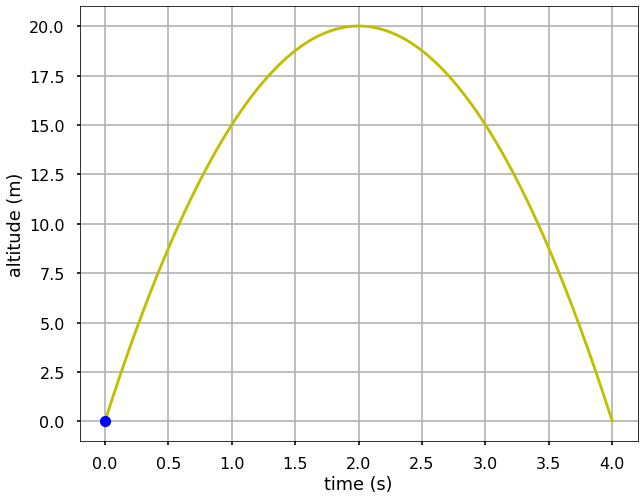

N= 4096
peak is located at
t = 2.0
y= 20.009765624984755


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# gravity
g = 10

# time
tbeg = 0
tend = 4

# discretization of time
N = 4096
h = (tend - tbeg) / N

# left b.c. position according to given table
t0 = 0
y0 = 0
n = int(t0/h)
print(n)

# left b.c. velocity according to given table
t0 = 0
v0 = 20

# Get A
A = np.zeros((N+1, N+1))
A[0, 0] = 1
A[N, 0] = -1
A[N, 1] = 1
for i in range(1, N):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

#print(A)

# Get b
b = np.zeros(N+1)
b[1:-1] = -g * h**2
b[0] = y0
b[N] = h * v0
#print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

# time variable
t = np.linspace(tbeg, tend, N + 1)

# show results
plt.figure(figsize=(10,8))
plt.plot(t, y, 'y')
plt.grid()
plt.plot(t0, y0, 'bo')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

print("N=", N)
print("peak is located at")
print("t =", t[int(N/2)])
print("y=", y[int(N/2)])

## refs
1. Qingkai Kong, Timmy Siauw, Alexandre Bayen, "Finite Difference Method", Python Programming And Numerical Methods: A Guide For Engineers And Scientists, 1st edition, Nov 2020, url <https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html> [20221026]